In [265]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [266]:
# official final rankings in D3 National Championships
final_rankings = [
    "MIT", "U. of Chicago", "Williams", "NYU", "Johns Hopkins", "Colorado College", "Emory", "Washington and Lee", "SUNY Geneseo", "Washington U.", "Claremont-Mudd-Scripps", "RPI", "Wis.-La Crosse", "Amherst", "Calvin", "Tufts", "St. Olaf", "Carleton", "UC Santa Cruz", "Vassar", "George Fox", "Middlebury", "Connecticut College", "Wesleyan", "Carnegie Mellon", "Wartburg", "Lynchburg", "Trine", "DePauw", "Pomona-Pitzer", "Coast Guard", "Rowan"
]
# given two lists of rankings, find the mean squared error of their positions 
def compare_lists(list1, list2):
    schools = set(list1 + list2)
    se = []
    # return number of schools in both lists
    # return stats.spearmanr(list1, list2)[0]
    return len(set(list1).intersection(set(list2)))/len(schools)



    # for school in schools:
    #     if school in list1 and school in list2:
    #         se.append((list1.index(school) - list2.index(school)) ** 2)
    # return np.sqrt(sum(se)) / len(schools)


In [267]:
adj = pd.read_csv("./running_all_d3.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [268]:
L = pd.read_csv("./running_all_d3_diff.csv", header=0)
L = L.to_numpy()

In [269]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [270]:
def springRank(G, nodelist, alpha=0.1, change_adj = False,change_minus_one=False):

    if change_adj:
        adj = pd.read_csv("./running_all_d3_diff.csv", header=0)
        A = adj.values
    else: #just use what we already have 
        A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)
    # k_out = np.zeros(len(A))
    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[i][j]
    #     k_out[i] = total


    new_sub = np.zeros(len(A))
    for i in range(len(A)):
        for j in range(len(A[i])):
            if change_minus_one:
                new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
            else:
                new_sub[i] += (A[j][i] - A[i][j])

            # new_sub[i] += (A[j][i] - A[i][j])
    

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)


    sub = k_in - k_out

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

In [271]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


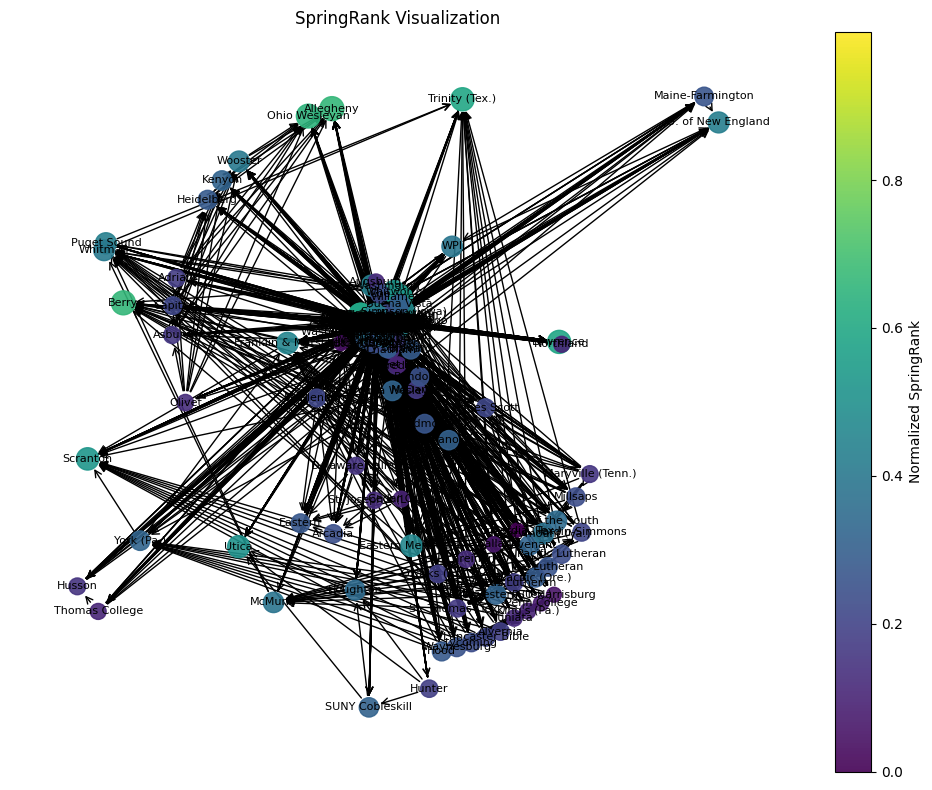

In [272]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G, scale=2)
nodes = nx.draw_networkx_nodes(
    G, 
    pos,
    nodelist=labels,
    node_color=scores_norm,
    cmap=plt.cm.viridis,
    node_size=100 + 300 * scores_norm,
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label="Normalized SpringRank")
plt.title("SpringRank Visualization", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

In [273]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
#   # get the ordered list

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. U. of Chicago - 1.0000
2. Williams - 0.8508
3. Wartburg - 0.8410
4. Washington U. - 0.8243
5. Claremont-Mudd-Scripps - 0.8023
6. RPI - 0.8017
7. Amherst - 0.8014
8. NYU - 0.7885
9. Wis.-La Crosse - 0.7595
10. Colorado College - 0.7555
11. Vassar - 0.7513
12. Washington and Lee - 0.7503
13. DePauw - 0.7485
14. UC Santa Cruz - 0.7443
15. St. Olaf - 0.7381
16. Middlebury - 0.7366
17. SUNY Geneseo - 0.7347
18. Calvin - 0.7334
19. Emory - 0.7247
20. George Fox - 0.7179
21. Carleton - 0.7134
22. Trine - 0.7127
23. Johns Hopkins - 0.7057
24. Wis.-Eau Claire - 0.7055
25. Wittenberg - 0.6971
26. Pomona-Pitzer - 0.6918
27. MIT - 0.6910
28. Lynchburg - 0.6899
29. Carnegie Mellon - 0.6896
30. Connecticut College - 0.6896
31. Rochester - 0.6844
32. John Carroll - 0.6844
33. Central College - 0.6741
34. Tufts - 0.6697
35. Gettysburg - 0.6654
36. Allegheny - 0.6638
37. Hamilton - 0.6619
38. Berry - 0.6602
39. Redlands - 0.6575
40. Coast Guard - 0.6573
41. Wis.-Whitewater - 0.6540
4

In [274]:
ordered = []

for i in range(len(final_rankings)):
    ordered.append(sorted_list[i][0])
compare_lists(final_rankings, ordered)
    

0.7777777777777778